# Simulation Test - mAUV Dynamics Only

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from cycler import *
# plt.style.use('ggplot')
font = {'family' : 'Times New Roman',
        'size'   : 12}
plt.rc('lines', linewidth=2, markersize=1)
plt.rc('font', **font)
plt.rc('grid', c='0.5', ls='-', lw=0.5)
params = {'axes.grid': True, 'axes.labelsize': 12,'axes.titlesize': 12, 'font.size': 12, 'legend.fontsize': 12, 'xtick.labelsize': 12, 'ytick.labelsize': 12}

plt.rcParams.update(params)

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

def get_cmap(n, name='Paired'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    #return plt.cm.get_cmap(name, n)
    return plt.get_cmap(name)
cmap = get_cmap(6)



data_path = '/home/alsaibie/UWSim/src/underwater_simulation/dynamics_stack/unit_sim_nonreal/Install/data/'
fontP = FontProperties()

plot_dynamics = True
plot_dynamic_param = True
plot_sensor = True
plot_pos_control = True
plot_att_control = True
plot_errors = True
skip_resample = 2

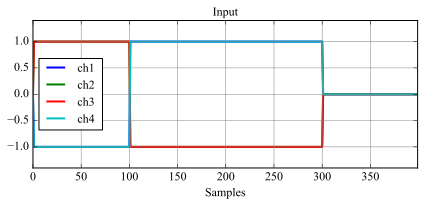

In [103]:
# Will generate a 4 channel output between -1 and 1
!{'./gen_commands_motors.py'}
# !{'./gen_commands_trpy.py'}

input_data = pd.read_csv(data_path + 'generic_input.txt', skipinitialspace=True)
#Let's Plot
fig, axis = plt.subplots(figsize=(6,3), nrows=1, ncols=1)
# plt.gca().set_prop_cycle('color', [cmap(0), cmap(1), cmap(2), cmap(3), cmap(4), cmap(5)])

ax = input_data.loc[::, input_data.columns[0:4]].plot(ax=axis, title = "Input", lw=2, ylim=[-1.4,1.4])
# ax = input_data.loc[::skip_resample, input_data.columns[1]].plot(ax=axis, title = "Input CH2", lw=2, ylim=[-1.4,1.4], sharex=ax)
# ax = input_data.loc[::skip_resample, input_data.columns[2]].plot(ax=axis, title = "Input CH3", lw=2, ylim=[-1.4,1.4], sharex=ax)
# ax = input_data.loc[::skip_resample, input_data.columns[3]].plot(ax=axis, title = "Input CH4", lw=2, ylim=[-1.4,1.4], sharex=ax)
ax.set_xlabel('Samples')
fig.tight_layout()

In [104]:
!{'../dynamics_stack/unit_sim_nonreal/Install/bin/unit_sim_nonreal'}

Mass Matrix
   0.359772           0           0           0           0           0
          0    0.383108           0           0           0           0
          0           0    0.383108           0           0           0
          0           0           0 0.000408576           0           0
          0           0           0           0 0.000337109           0
          0           0           0           0           0 0.000545101
B Matrix
    1     1     1     1     0     0     0     0
    0     0     0     0     0     0     0     0
    0     0     0     0     0     0     0     0
    0     0     0     0     1     1    -1    -1
-0.03  0.03 -0.03  0.03     0     0     0     0
-0.03  0.03  0.03 -0.03     0     0     0     0
Sub B Matrix
-0.03  0.03 -0.03  0.03
-0.03  0.03  0.03 -0.03
 Unity Dvv Vector: 
   2.1701
  2.22663
   3.5104
0.0005323
0.0005323
0.0005323
 Unity Cv Matrix: 
           0            0            0           -0     0.383108    -0.383108
           0         

,p.x,p.y,p.z,att.x,att.y,att.z,attq.w,attq.x,attq.y,attq.z,...,v.yaw,pdot.x,pdot.y,pdot.z,vdot.x,vdot.y,vdot.z,vdot.r,vdot.p,vdot.yaw
Time (ms),,,,,,,,,,,,,,,,,,,,,
3920,-1,1,4,0,0,-1.16119,0.836137,0,0,-0.548520,...,-2.49869,0,0,0,0,0,0,0,0,4.57349
3940,-1,1,4,0,0,-1.21022,0.822440,0,0,-0.568852,...,-2.40967,0,0,0,0,0,0,0,0,4.34182
3960,-1,1,4,0,0,-1.25752,0.808758,0,0,-0.588141,...,-2.32515,0,0,0,0,0,0,0,0,4.12395
3980,-1,1,4,0,0,-1.30317,0.795124,0,0,-0.606447,...,-2.24484,0,0,0,0,0,0,0,0,3.91888
4000,-1,1,4,0,0,-1.34726,0.781563,0,0,-0.623827,...,-2.16851,0,0,0,0,0,0,0,0,3.72568


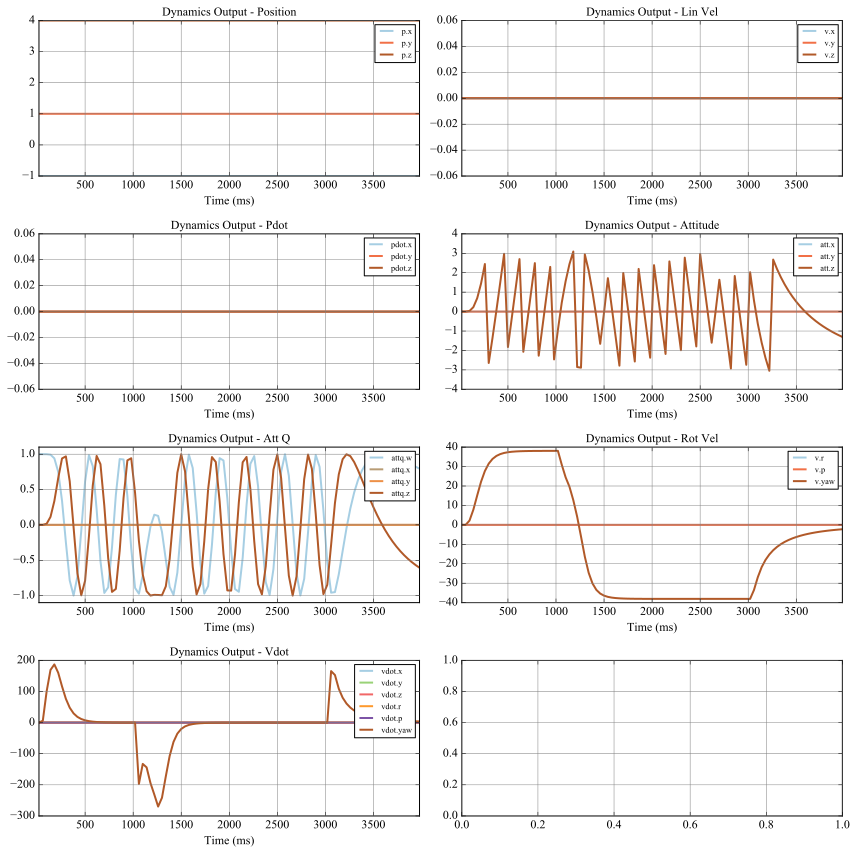

In [105]:
dynamics_data = pd.read_csv(data_path + 'dynamics_output.txt', skipinitialspace=True).loc[::, :].rename(columns={'time' : 'Time (ms)'}).set_index('Time (ms)')
if plot_dynamics:
    display(dynamics_data.tail())
    fig, axes = plt.subplots(figsize=(12,12), nrows=4, ncols=2)

    fontP.set_size('small')
    ax_pos = dynamics_data.loc[::skip_resample, 'p.x':'p.z'].plot(ax=axes[0,0], title = 'Dynamics Output - Position', colormap='Paired').legend(loc=1, prop=fontP)
    ax_vel = dynamics_data.loc[::skip_resample, 'v.x':'v.z'].plot(ax=axes[0,1], title = 'Dynamics Output - Lin Vel', colormap='Paired').legend(loc=1, prop=fontP)
    ax_rot = dynamics_data.loc[::skip_resample, 'pdot.x':'pdot.z'].plot(ax=axes[1,0], title = 'Dynamics Output - Pdot', colormap='Paired').legend(loc=1, prop=fontP)

    ax_att = dynamics_data.loc[::skip_resample, 'att.x':'att.z'].plot(ax=axes[1,1], title = 'Dynamics Output - Attitude', colormap='Paired').legend(loc=1, prop=fontP)
    ax_rot = dynamics_data.loc[::skip_resample, 'attq.w':'attq.z'].plot(ax=axes[2,0], title = 'Dynamics Output - Att Q', colormap='Paired', ylim=[-1.1,1.1]).legend(loc=1, prop=fontP)
    ax_rot = dynamics_data.loc[::skip_resample, 'v.r':'v.yaw'].plot(ax=axes[2,1], title = 'Dynamics Output - Rot Vel', colormap='Paired').legend(loc=1, prop=fontP)
    ax_rot = dynamics_data.loc[::skip_resample, 'vdot.x':'vdot.yaw'].plot(ax=axes[3,0], title = 'Dynamics Output - Vdot', colormap='Paired').legend(loc=1, prop=fontP)
    fig.tight_layout()

,acc.x,acc.y,acc.z,gyro.x,gyro.y,gyro.z,mag.x,mag.y,mag.z
Time (ms),,,,,,,,,
20,-0.012912,-0.012767,-9.80115,-0.000664,0.000255,0.000475,0.946079,0.092511,0.340742
40,0.000581,-0.000158,-9.81807,0.001083,-0.000943,0.001027,0.932502,0.081324,0.348746
60,0.013652,-0.001569,-9.80915,-0.000008,-0.000396,-0.014085,0.925990,0.092630,0.353067
80,-0.000183,-0.014234,-9.80338,-0.000143,-0.000272,-0.638703,0.923043,0.078448,0.331011
100,-0.000807,0.013555,-9.79423,0.000572,0.000079,-2.223080,0.948062,0.051448,0.351321


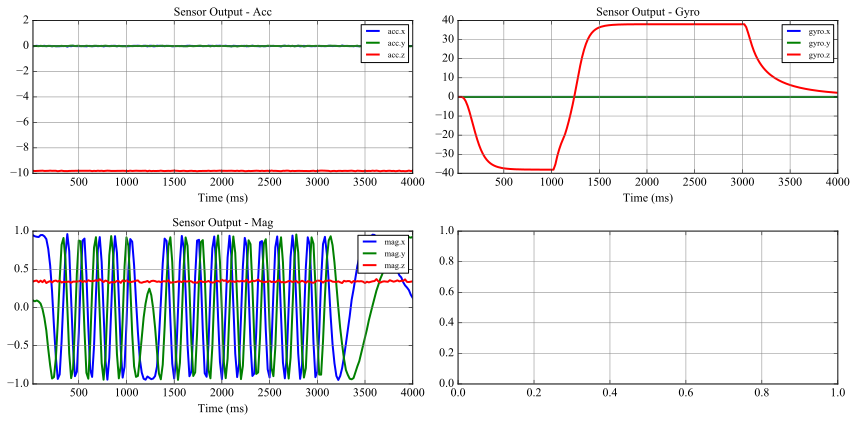

In [106]:
sensor_output = pd.read_csv(data_path + 'sensor_output.txt', skipinitialspace=True).iloc[::, :].rename(columns={'time' : 'Time (ms)'}).set_index('Time (ms)')

if plot_sensor:
    # Sensor Output
    display(sensor_output.head())
    fig, axes = plt.subplots(figsize=(12,6), nrows=2, ncols=2)
    ax_acc = sensor_output.loc[:, 'acc.x':'acc.z'].plot(ax=axes[0,0], title = 'Sensor Output - Acc').legend(loc=1, prop=fontP)
    ax_gyro = sensor_output.loc[:, 'gyro.x':'gyro.z'].plot(ax=axes[0,1], title = 'Sensor Output - Gyro').legend(loc=1, prop=fontP)
    ax_mag = sensor_output.loc[:, 'mag.x':'mag.z'].plot(ax=axes[1,0], title = 'Sensor Output - Mag').legend(loc=1, prop=fontP)
    fig.tight_layout()

In [107]:
dynamics_param_tau = pd.read_csv(data_path + 'dynamics_param_output_tau.txt', skipinitialspace=True).iloc[::skip_resample, :].rename(columns={'time' : 'Time (ms)'}).set_index('Time (ms)')


In [108]:
stacked_data = pd.concat([dynamics_data, sensor_output, dynamics_param_tau], axis=1)
stacked_data.columns

Index(['p.x', 'p.y', 'p.z', 'att.x', 'att.y', 'att.z', 'attq.w', 'attq.x',
       'attq.y', 'attq.z', 'v.x', 'v.y', 'v.z', 'v.r', 'v.p', 'v.yaw',
       'pdot.x', 'pdot.y', 'pdot.z', 'vdot.x', 'vdot.y', 'vdot.z', 'vdot.r',
       'vdot.p', 'vdot.yaw', 'acc.x', 'acc.y', 'acc.z', 'gyro.x', 'gyro.y',
       'gyro.z', 'mag.x', 'mag.y', 'mag.z', 'tau1', 'tau2', 'tau3', 'tau4',
       'tau5', 'tau6'],
      dtype='object')

In [109]:
Pitch = '30'
Diameter = '30'
JUsed = 'Real' #Real or Ideal or InPipe (Real)
Dir = 'Yaw' # Surge, Roll, Pitch or Yaw
stacked_data.to_pickle('Pickles/Agility/Dynamics_' + Diameter + 'D_' + Pitch + 'P_' + JUsed + 'J_TimeSeries_' + Dir +'Only_Agility_crr' )